In [37]:
# !pip freeze > requirements.txt

**CAPITULO 18: INTRODUCCION A SEABORN**

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [39]:
data = sns.load_dataset("penguins")
data.dropna()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


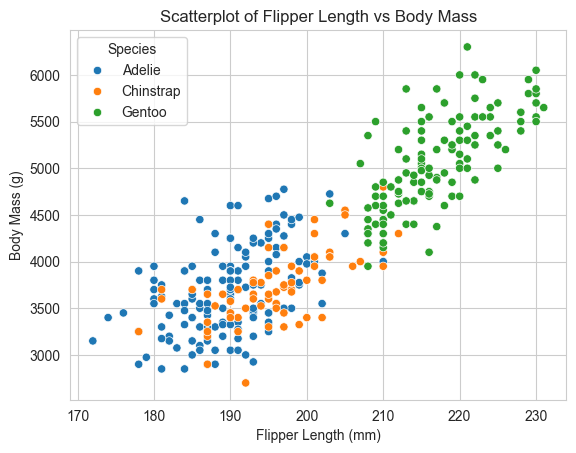

In [40]:
sns.scatterplot(data=data, x="flipper_length_mm", y="body_mass_g", hue="species")
plt.title("Flipper Length vs Body Mass of Penguins")
plt.xlabel("Flipper Length (mm)")
plt.ylabel("Body Mass (g)")
plt.legend(title="Species")
plt.title("Scatterplot of Flipper Length vs Body Mass")
plt.grid(True)
plt.savefig("img/penguins_scatterplot.png", dpi=300)
plt.show()

In [41]:
data.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

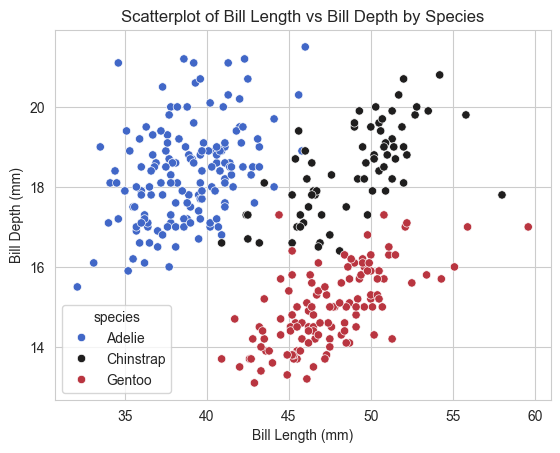

In [42]:
#otro grafico de dispersión personalizado
sns.set_style("whitegrid")
# palette = sns.color_palette("coolwarm", n_colors=3)
palette = sns.color_palette("icefire", n_colors=3)

sns.scatterplot(data=data, x="bill_length_mm", y="bill_depth_mm", hue="species", palette=palette)
plt.title("Scatterplot of Bill Length vs Bill Depth by Species")
plt.xlabel("Bill Length (mm)")
plt.ylabel("Bill Depth (mm)")
plt.show()

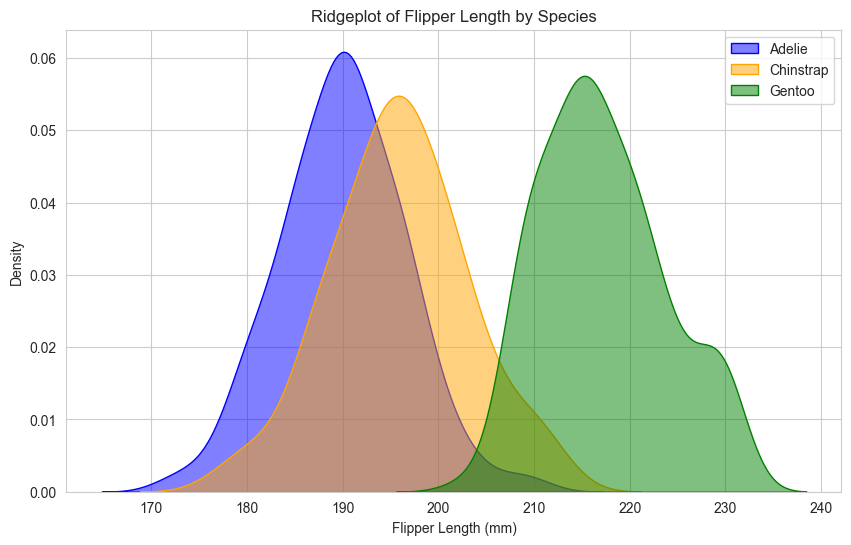

In [43]:
#Grafico de Ridgeplot
adelie = data[data["species"] == "Adelie"]
chinstrap = data[data["species"] == "Chinstrap"]
gentoo = data[data["species"] == "Gentoo"]

fig, ax = plt.subplots(figsize=(10, 6))

sns.kdeplot(data=adelie["flipper_length_mm"], label="Adelie", ax=ax, fill=True, color="blue", alpha=0.5)
sns.kdeplot(data=chinstrap["flipper_length_mm"], label="Chinstrap", ax=ax, fill=True, color="orange", alpha=0.5)
sns.kdeplot(data=gentoo["flipper_length_mm"], label="Gentoo", ax=ax, fill=True, color="green", alpha=0.5)

ax.legend(loc="upper right")

plt.title("Ridgeplot of Flipper Length by Species")
plt.xlabel("Flipper Length (mm)")
plt.show()

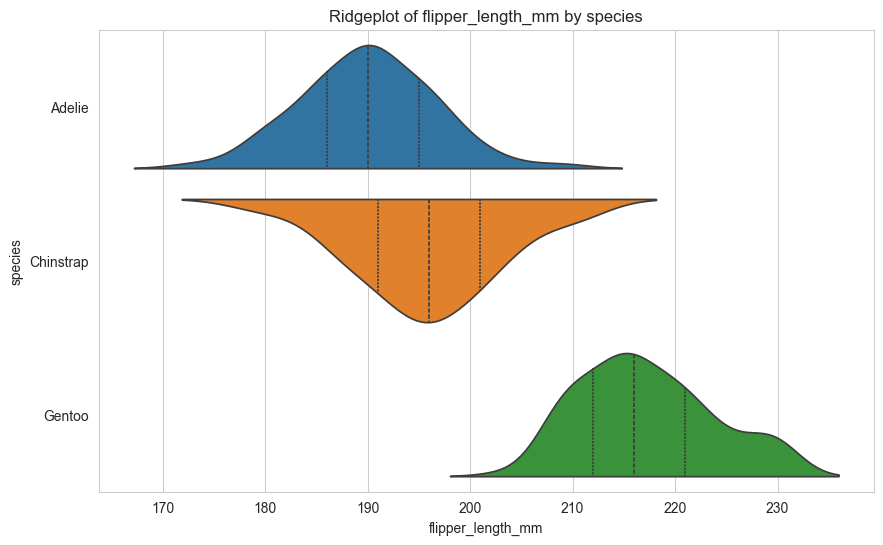

In [44]:
# generar una grafica de ridgeplot (joyplot) usando violinplot para variables categoricas
def ridgeplot(data, x, y, hue=None):
    plt.figure(figsize=(10, 6))
    sns.violinplot(data=data, x=x, y=y, hue=hue, split=True if hue else False, inner="quartile")
    plt.title(f"Ridgeplot of {x} by {y}")
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

ridgeplot(data, x="flipper_length_mm", y="species", hue="species")

**CAPITULO 19: GRAFICOS AVANZADOS CON SEABORN**

In [45]:
np.random.seed(42)

car_age = np.random.randint(1, 20, size=250)
car_price = 30 - car_age + np.random.normal(-3, 3, size=250)

car_data = pd.DataFrame({
    "age": car_age,
    "price": car_price
}) 
car_data

,age,price
0,7,19.263836
1,15,9.738792
2,11,13.331457
3,8,16.552569
4,7,19.768695
...,...,...
245,7,23.833030
246,3,24.996942
247,17,7.754540
248,1,30.653456


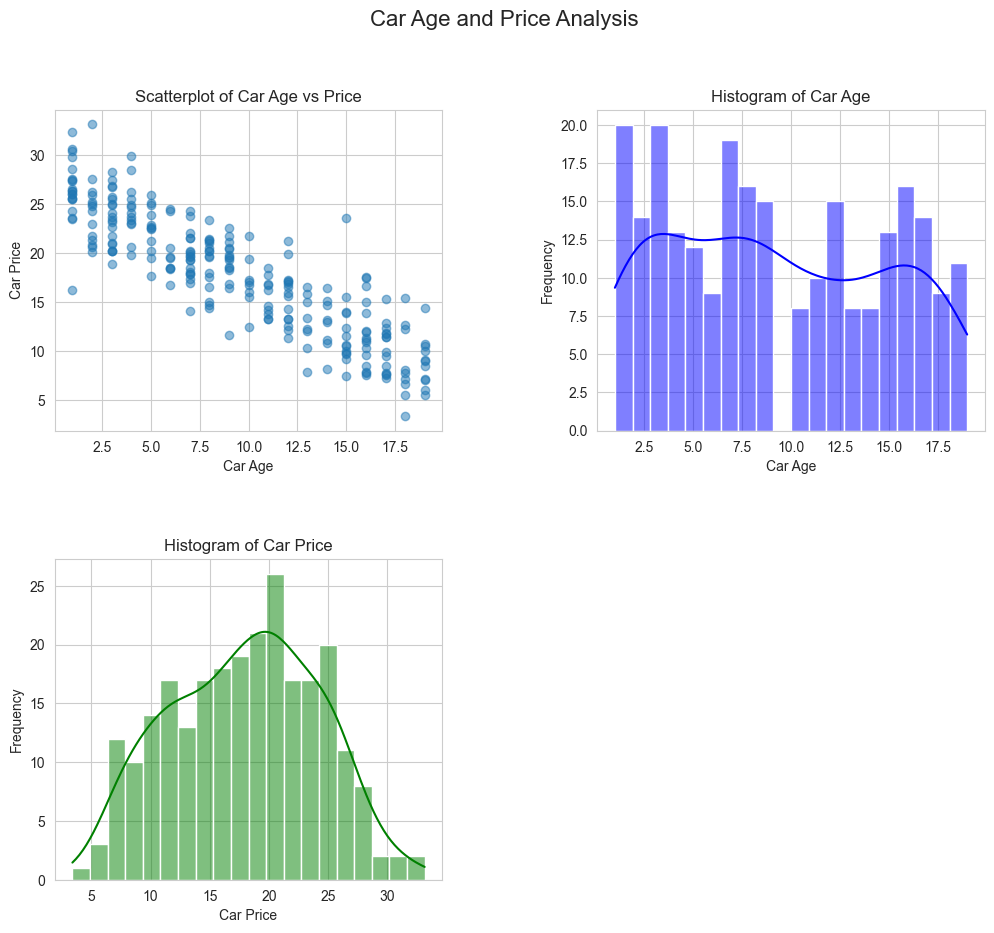

In [46]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

ax[0, 0].scatter(car_data["age"], car_data["price"], alpha=0.5)
ax[0, 0].set_title("Scatterplot of Car Age vs Price")
ax[0, 0].set_xlabel("Car Age")
ax[0, 0].set_ylabel("Car Price")
# sns.kdeplot(data=car_data, x="age", y="price", fill=True, cmap="viridis", ax=ax[0, 0])

#histograma de la variable "age"
sns.histplot(data=car_data, x="age", bins=20, kde=True, ax=ax[0, 1], color="blue", alpha=0.5)
ax[0, 1].set_title("Histogram of Car Age")
ax[0, 1].set_xlabel("Car Age")
ax[0, 1].set_ylabel("Frequency")

#histograma de la variable "price"
sns.histplot(data=car_data, x="price", bins=20, kde=True, ax=ax[1, 0], color="green", alpha=0.5)
ax[1, 0].set_title("Histogram of Car Price")
ax[1, 0].set_xlabel("Car Price")
ax[1, 0].set_ylabel("Frequency")

#borrar el cuadro vacio
# fig.delaxes(ax[1, 1])
# plt.tight_layout()

ax[1, 1].axis('off')
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.suptitle("Car Age and Price Analysis", fontsize=16)
plt.show()

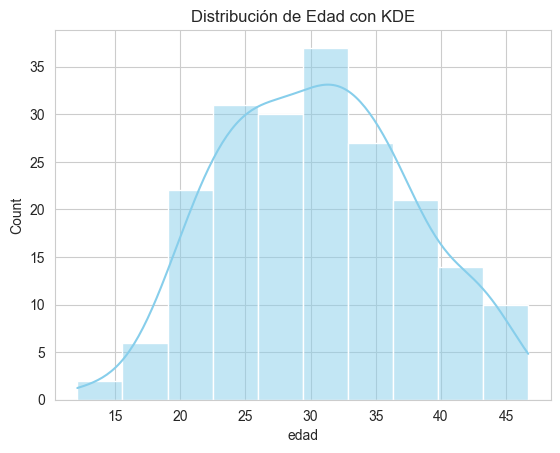

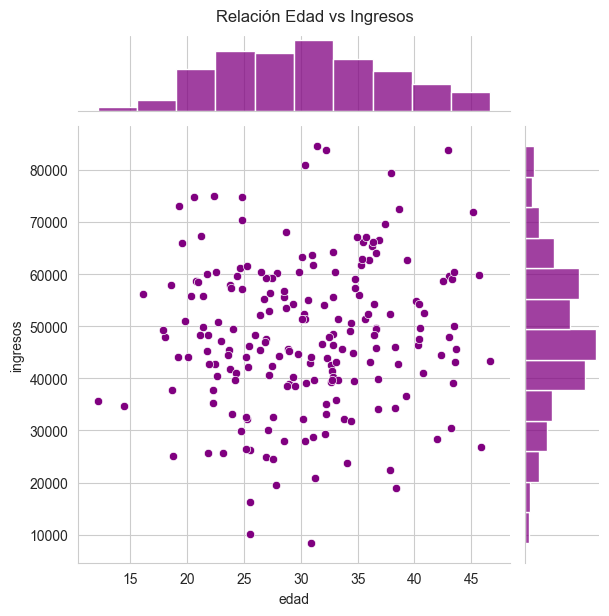

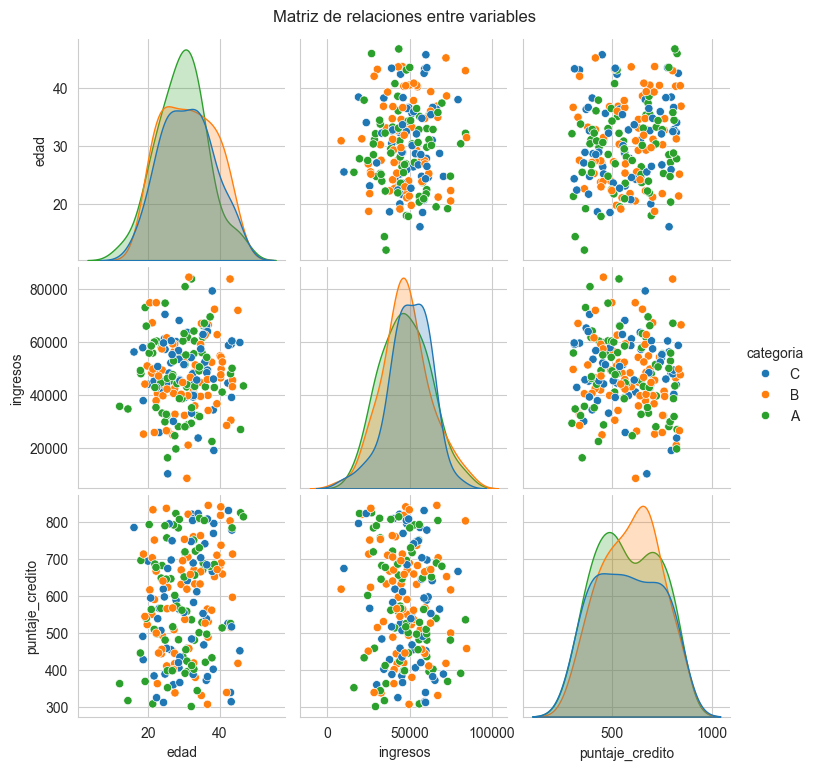

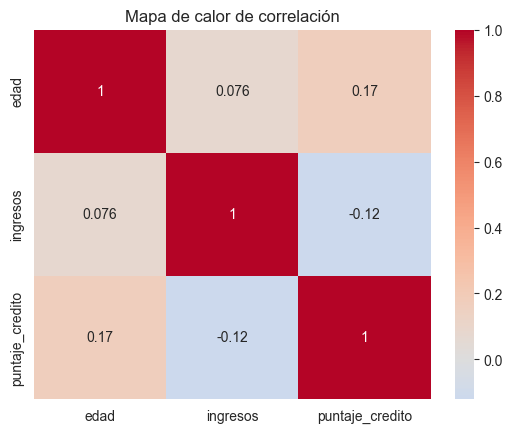

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Dataset de ejemplo
np.random.seed(0)
df = pd.DataFrame({
    'edad': np.random.normal(30, 7, 200),
    'ingresos': np.random.normal(50000, 15000, 200),
    'puntaje_credito': np.random.randint(300, 850, 200),
    'categoria': np.random.choice(['A', 'B', 'C'], 200)
})

# 1. sns.distplot() [Deprecado, usar histplot y kdeplot juntos]
# Pero para mostrar uso similar:
sns.histplot(df['edad'], kde=True, color='skyblue')
plt.title('Distribución de Edad con KDE')
plt.show()

# 2. sns.jointplot() - relación entre dos variables con distribuciones marginales
sns.jointplot(x='edad', y='ingresos', data=df, kind='scatter', color='purple')
plt.suptitle('Relación Edad vs Ingresos', y=1.02)
plt.show()

# 3. sns.pairplot() - matriz de scatter plots para variables numéricas
sns.pairplot(df[['edad', 'ingresos', 'puntaje_credito', 'categoria']], diag_kind='kde', hue='categoria')
plt.suptitle('Matriz de relaciones entre variables', y=1.02)
plt.show()

# 4. sns.heatmap() - mapa de calor para matriz de correlación
corr = df[['edad', 'ingresos', 'puntaje_credito']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Mapa de calor de correlación')
plt.show()


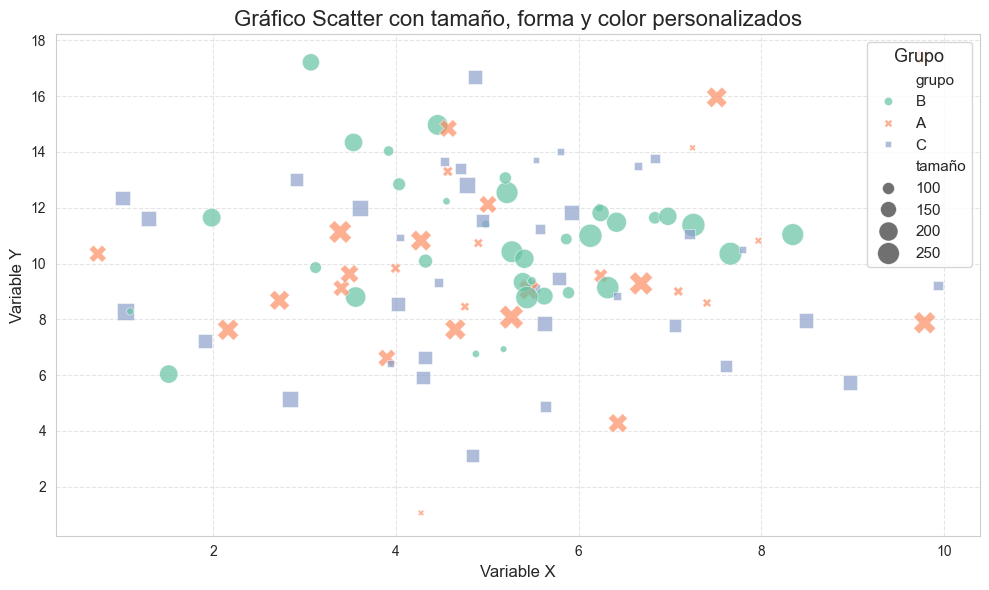

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Datos de ejemplo
np.random.seed(10)
df = pd.DataFrame({
    'x': np.random.normal(5, 2, 100),
    'y': np.random.normal(10, 3, 100),
    'grupo': np.random.choice(['A', 'B', 'C'], 100),
    'tamaño': np.random.uniform(50, 300, 100)
})

# Crear figura con tamaño personalizado
plt.figure(figsize=(10, 6))

# Gráfico scatter con control de color, forma y tamaño de puntos
sns.scatterplot(
    data=df,
    x='x',
    y='y',
    hue='grupo',           # Controla el color según grupo
    style='grupo',         # Cambia forma del marcador según grupo
    size='tamaño',         # Tamaño variable de puntos
    sizes=(20, 300),       # Rango de tamaños para los puntos
    palette='Set2',        # Paleta de colores personalizada
    alpha=0.7              # Transparencia para mejorar visibilidad
)

# Personalización adicional
plt.title('Gráfico Scatter con tamaño, forma y color personalizados', fontsize=16)
plt.xlabel('Variable X', fontsize=12)
plt.ylabel('Variable Y', fontsize=12)
plt.legend(title='Grupo', title_fontsize='13', fontsize='11', loc='upper right')
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()
